In [2]:
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import itertools
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.models import load_model


Using TensorFlow backend.


In [3]:
# build a model
model = Sequential()
model.add(Dense(units=2, activation='relu', input_dim=4))
model.add(Dense(units=3, activation='softmax'))

In [4]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [5]:
iris = datasets.load_iris()
X = iris.data
y = iris.target.reshape(-1,1)
enc = OneHotEncoder()
enc.fit(y)
y = enc.transform(y).toarray()


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)




(120, 4)
(30, 4)
(120, 3)
(30, 3)


In [6]:
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
120/120 [==============================] - 1s 6ms/step - loss: 1.7332 - acc: 0.3333
Epoch 2/100
120/120 [==============================] - 0s 183us/step - loss: 1.4388 - acc: 0.3333
Epoch 3/100
120/120 [==============================] - 0s 217us/step - loss: 1.2919 - acc: 0.3333
Epoch 4/100
120/120 [==============================] - 0s 367us/step - loss: 1.2066 - acc: 0.3000
Epoch 5/100
120/120 [==============================] - 0s 208us/step - loss: 1.1563 - acc: 0.3417
Epoch 6/100
120/120 [==============================] - 0s 233us/step - loss: 1.1209 - acc: 0.3417
Epoch 7/100
120/120 [==============================] - 0s 242us/step - loss: 1.0967 - acc: 0.3417
Epoch 8/100
120/120 [==============================] - 0s 225us/step - loss: 1.0734 - acc: 0.3417
Epoch 9/100
120/120 [==============================] - 0s 217us/step - loss: 1.0551 - acc: 0.3500
Epoch 10/100
120/120 [==============================] - 0s 258us/step - loss: 1.0380 - acc: 0.4667
Epoch 11/100
120/120 

120/120 [==============================] - 0s 258us/step - loss: 0.5416 - acc: 0.8583
Epoch 84/100
120/120 [==============================] - 0s 292us/step - loss: 0.5379 - acc: 0.9083
Epoch 85/100
120/120 [==============================] - 0s 217us/step - loss: 0.5336 - acc: 0.8333
Epoch 86/100
120/120 [==============================] - 0s 200us/step - loss: 0.5318 - acc: 0.8833
Epoch 87/100
120/120 [==============================] - 0s 292us/step - loss: 0.5252 - acc: 0.8667
Epoch 88/100
120/120 [==============================] - 0s 258us/step - loss: 0.5321 - acc: 0.8333
Epoch 89/100
120/120 [==============================] - 0s 192us/step - loss: 0.5194 - acc: 0.8833
Epoch 90/100
120/120 [==============================] - 0s 200us/step - loss: 0.5165 - acc: 0.8833
Epoch 91/100
120/120 [==============================] - 0s 300us/step - loss: 0.5144 - acc: 0.8000
Epoch 92/100
120/120 [==============================] - 0s 242us/step - loss: 0.5076 - acc: 0.8583
Epoch 93/100
120/120 [=

In [25]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        10
 versicolor       0.00      0.00      0.00         9
  virginica       0.55      1.00      0.71        11

avg / total       0.54      0.70      0.59        30

Confusion matrix, without normalization
[[10  0  0]
 [ 0  0  9]
 [ 0  0 11]]
Normalized confusion matrix
[[ 1.  0.  0.]
 [ 0.  0.  1.]
 [ 0.  0.  1.]]


D:\Anaconda2\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


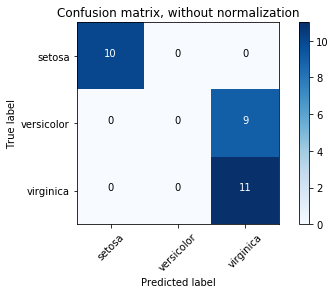

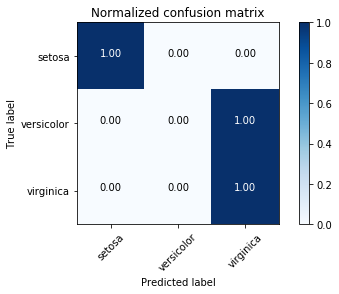

In [28]:
y_pred = model.predict_classes(X_test)
y_true = np.argmax(y_test, axis=1)

print(classification_report(y_true,y_pred,target_names=iris.target_names))
cnf_matrix =confusion_matrix(y_true,y_pred)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=iris.target_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=iris.target_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

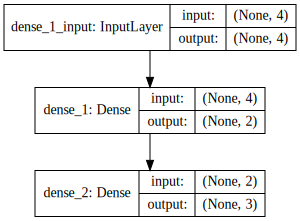

In [13]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))


In [27]:
model.save('irismodel.h5')

model = load_model('irismodel.h5')

['/job:localhost/replica:0/task:0/device:GPU:0']